In [10]:
from google.colab import files

uploaded= files.upload()

Saving blogs_categories.csv to blogs_categories.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Exploration and Preprocessing**

In [2]:
# Loading the dataset and checking the size

df= pd.read_csv("blogs_categories.csv")
df.shape

(19997, 3)

In [3]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [4]:
# Dropped the unnamed column

df.drop("Unnamed: 0", axis= True, inplace= True)

In [5]:
df.head()

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [6]:
# Checking for missing values

df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [7]:
# Checking for duplicates

df[df.duplicated()].shape

(5, 2)

In [8]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)

In [9]:
# Cheking data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19992 entries, 0 to 19996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    19992 non-null  object
 1   Labels  19992 non-null  object
dtypes: object(2)
memory usage: 468.6+ KB


In [10]:
# Checking for unique values to understand the balance or imbalance in the dataset

label_counts= df["Labels"].value_counts()
label_counts

Labels
alt.atheism                 1000
rec.sport.baseball          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
comp.graphics               1000
rec.sport.hockey            1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
comp.sys.mac.hardware        999
talk.politics.misc           999
sci.space                    997
soc.religion.christian       997
Name: count, dtype: int64

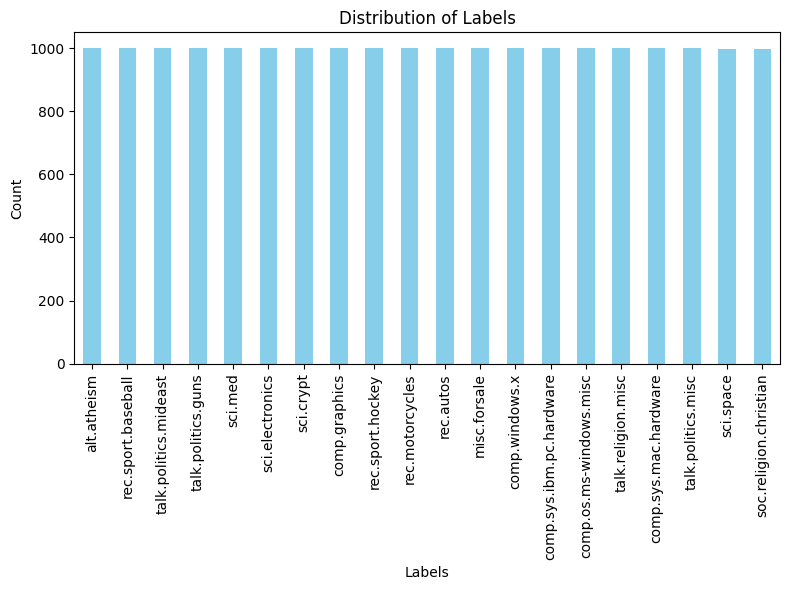

In [11]:
# Visualizing the balance or imbalance in the dataset

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [13]:
# Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens into a single string
    text = ' '.join(tokens)

    return text

# Apply preprocessing to both 'Data' and 'Labels' columns and create a new DataFrame with only two columns
preprocessed_data = {
    'Processed_Data': df['Data'].apply(preprocess_text),
    'Processed_Labels': df['Labels'].apply(preprocess_text)
}

# Create a new DataFrame with preprocessed text
preprocessed_df = pd.DataFrame(preprocessed_data)

# Display the DataFrame with processed text
print(preprocessed_df.head())

                                      Processed_Data Processed_Labels
0  xref cantaloupesrvcscmuedu altatheism altathei...       altatheism
1  xref cantaloupesrvcscmuedu altatheism altathei...       altatheism
2  newsgroups altatheism path cantaloupesrvcscmue...       altatheism
3  xref cantaloupesrvcscmuedu altatheism altpolit...       altatheism
4  xref cantaloupesrvcscmuedu altatheism socmotss...       altatheism


In [14]:
preprocessed_df.head()

,Processed_Data,Processed_Labels
0,xref cantaloupesrvcscmuedu altatheism altathei...,altatheism
1,xref cantaloupesrvcscmuedu altatheism altathei...,altatheism
2,newsgroups altatheism path cantaloupesrvcscmue...,altatheism
3,xref cantaloupesrvcscmuedu altatheism altpolit...,altatheism
4,xref cantaloupesrvcscmuedu altatheism socmotss...,altatheism


In [15]:
#  feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency) for text data

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed data
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_df['Processed_Data'])

# Display the TF-IDF features as a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df)

        aa  aaa  aaaa  aaaaa  aaaaaaaaaaaa  \
0      0.0  0.0   0.0    0.0           0.0   
1      0.0  0.0   0.0    0.0           0.0   
2      0.0  0.0   0.0    0.0           0.0   
3      0.0  0.0   0.0    0.0           0.0   
4      0.0  0.0   0.0    0.0           0.0   
...    ...  ...   ...    ...           ...   
19987  0.0  0.0   0.0    0.0           0.0   
19988  0.0  0.0   0.0    0.0           0.0   
19989  0.0  0.0   0.0    0.0           0.0   
19990  0.0  0.0   0.0    0.0           0.0   
19991  0.0  0.0   0.0    0.0           0.0   

       aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg  \
0                                                    0.0                                 
1                                                    0.0                                 
2                                                    0.0                                 
3                                                    0.0                               

In [16]:
tfidf_df.head()

,aa,aaa,aaaa,aaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaagggghhhh,aaaaarrrrgh,aaaah,aaaahhh,...,zzpvf,zzr,zztopdpscouk,zztvtznth,zzyhcnafbo,zzzs,zzzz,zzzzzz,zzzzzzcraycom,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
tfidf_df.shape

(19992, 186499)

# **2. Naive Bayes Model for Text Classification**

In [18]:
# Assigning x and y variables

x = tfidf_df.values
y = df["Labels"].values

In [19]:
# Data partition
# Using sparse matrix because of large data

from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split


# Convert TF-IDF matrix X to sparse matrix format
x_sparse = csr_matrix(x)

# Split the sparse matrix data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_sparse, y, test_size=0.3, random_state=42)

In [26]:
# Model fitting

from sklearn.naive_bayes import MultinomialNB

MNB= MultinomialNB()

MNB.fit(x_train, y_train)
y_pred_train=MNB.predict(x_train)
y_pred_test=MNB.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

ac_train=accuracy_score(y_train, y_pred_train)
ac_test=accuracy_score(y_test, y_pred_test)

print("Accuracy of train:",ac_train.round(2))
print("Accuracy of test:",ac_test.round(2))

# Calculate accuracy, precision, recall, and F1-score for training set
report_train = classification_report(y_train, y_pred_train, output_dict=True)

# Calculate accuracy, precision, recall, and F1-score for test set
report_test = classification_report(y_test, y_pred_test, output_dict=True)

# Print the evaluation metrics for training set
print("Evaluation metrics for training set:")
print("Accuracy:", report_train['accuracy'])
print("Precision:", report_train['macro avg']['precision'])
print("Recall:", report_train['macro avg']['recall'])
print("F1-score:", report_train['macro avg']['f1-score'])

# Print the evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print("Accuracy:", report_test['accuracy'])
print("Precision:", report_test['macro avg']['precision'])
print("Recall:", report_test['macro avg']['recall'])
print("F1-score:", report_test['macro avg']['f1-score'])


Accuracy of train: 0.96
Accuracy of test: 0.91
Evaluation metrics for training set:
Accuracy: 0.9569101043304273
Precision: 0.9574786330459893
Recall: 0.9570933026588657
F1-score: 0.9560455397462387

Evaluation metrics for test set:
Accuracy: 0.9063021007002334
Precision: 0.9037903310217077
Recall: 0.9054797537128867
F1-score: 0.9033027606625254


# **3. Sentiment Analysis**

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment of a text
def get_sentiment(text):
    # Get polarity scores
    scores = sia.polarity_scores(text)

    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the DataFrame with sentiment analysis results
print(df[['Data', 'Sentiment']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                    Data Sentiment
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative
...                                                  ...       ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Negative

[19992 rows x 2 columns]


In [28]:
# Group the data by category and sentiment
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Display the distribution of sentiments across different categories
print(sentiment_distribution)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                    379        8       613
comp.graphics                  123       47       830
comp.os.ms-windows.misc        204       45       751
comp.sys.ibm.pc.hardware       218       19       763
comp.sys.mac.hardware          242       47       710
comp.windows.x                 226       40       734
misc.forsale                   126       70       804
rec.autos                      304       28       668
rec.motorcycles                311       20       669
rec.sport.baseball             228       39       733
rec.sport.hockey               259       16       725
sci.crypt                      300        7       693
sci.electronics                178       36       786
sci.med                        346       22       632
sci.space                      271       21       705
soc.religion.christian         260        0       737
talk.politics.guns          

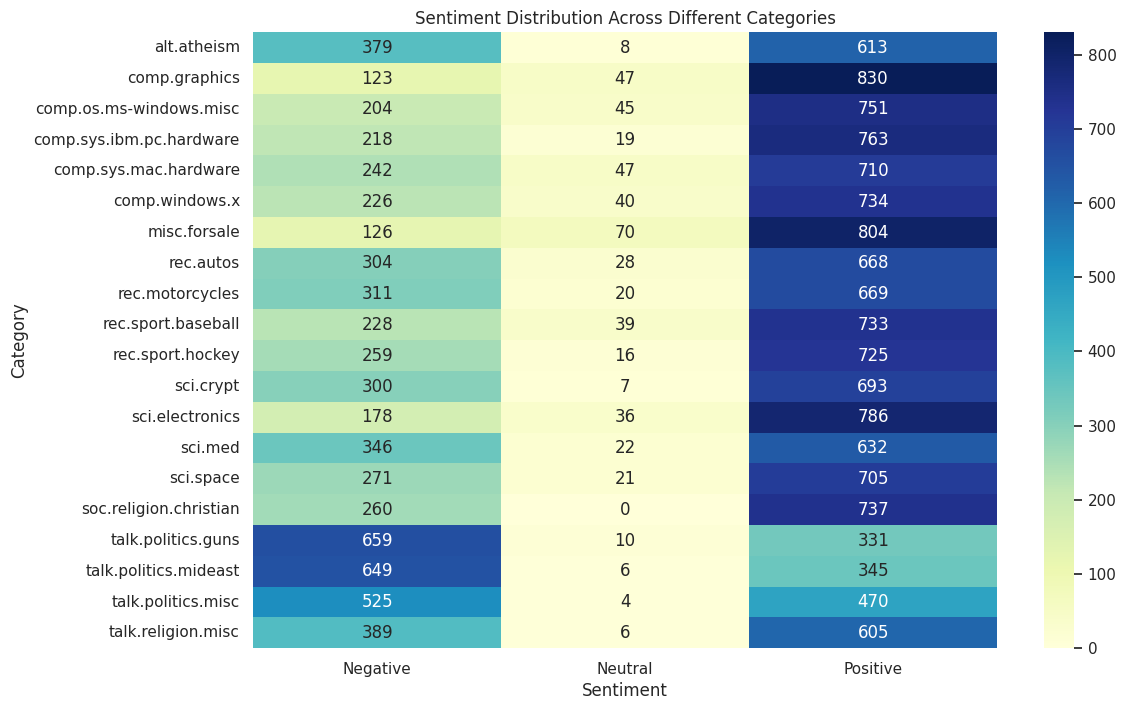

In [29]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of sentiments across different categories
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Sentiment Distribution Across Different Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

Threfore, overall sentiment expressed in the blog posts tends to be positive.

# **4. Evaluation**

1. The Naive Bayes classifier demonstrates robust performance on the training and test sets, achieving high accuracy and balanced precision, recall, and F1-score, indicating its effectiveness in categorizing blog posts accurately.

2. The Naive Bayes classifier exhibits strong performance in accurately categorizing blog posts into their respective categories.
However, challenges encountered during the classification process becuse of the class imbalances within the dataset. Also, model's training time was significantly impacted by the size of the dataset.

3. Positive sentiments are more prevalent in topics related to computer hardware and graphics, while negative sentiments are prominent in discussions on sensitive political issues. Neutral sentiments suggest factual or informative content. These insights can inform content creators about audience preferences and engagement levels in different topics.



